In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, argrelextrema
import glob
import utils
import scipy.stats as stats
from xhistogram.xarray import histogram

In [14]:
%config InlineBackend.figure_format = 'retina'
plt.style.use("/home/ghervieux/SCRIPTS/GEV/cma.mplstyle")

In [2]:
min_lat=50;max_lat=24
min_lon=235;max_lon=294

# Read AFI files

In [3]:
yearb=1981
yeare=2010

datadir='/data/ghervieux/AFI'
files=[f'{datadir}/AFI_ERA5_{iyear}.nc' for iyear in range(yearb,yeare+1)]

ds=xr.open_mfdataset(files)

Text(271, 40, 'pt 2')

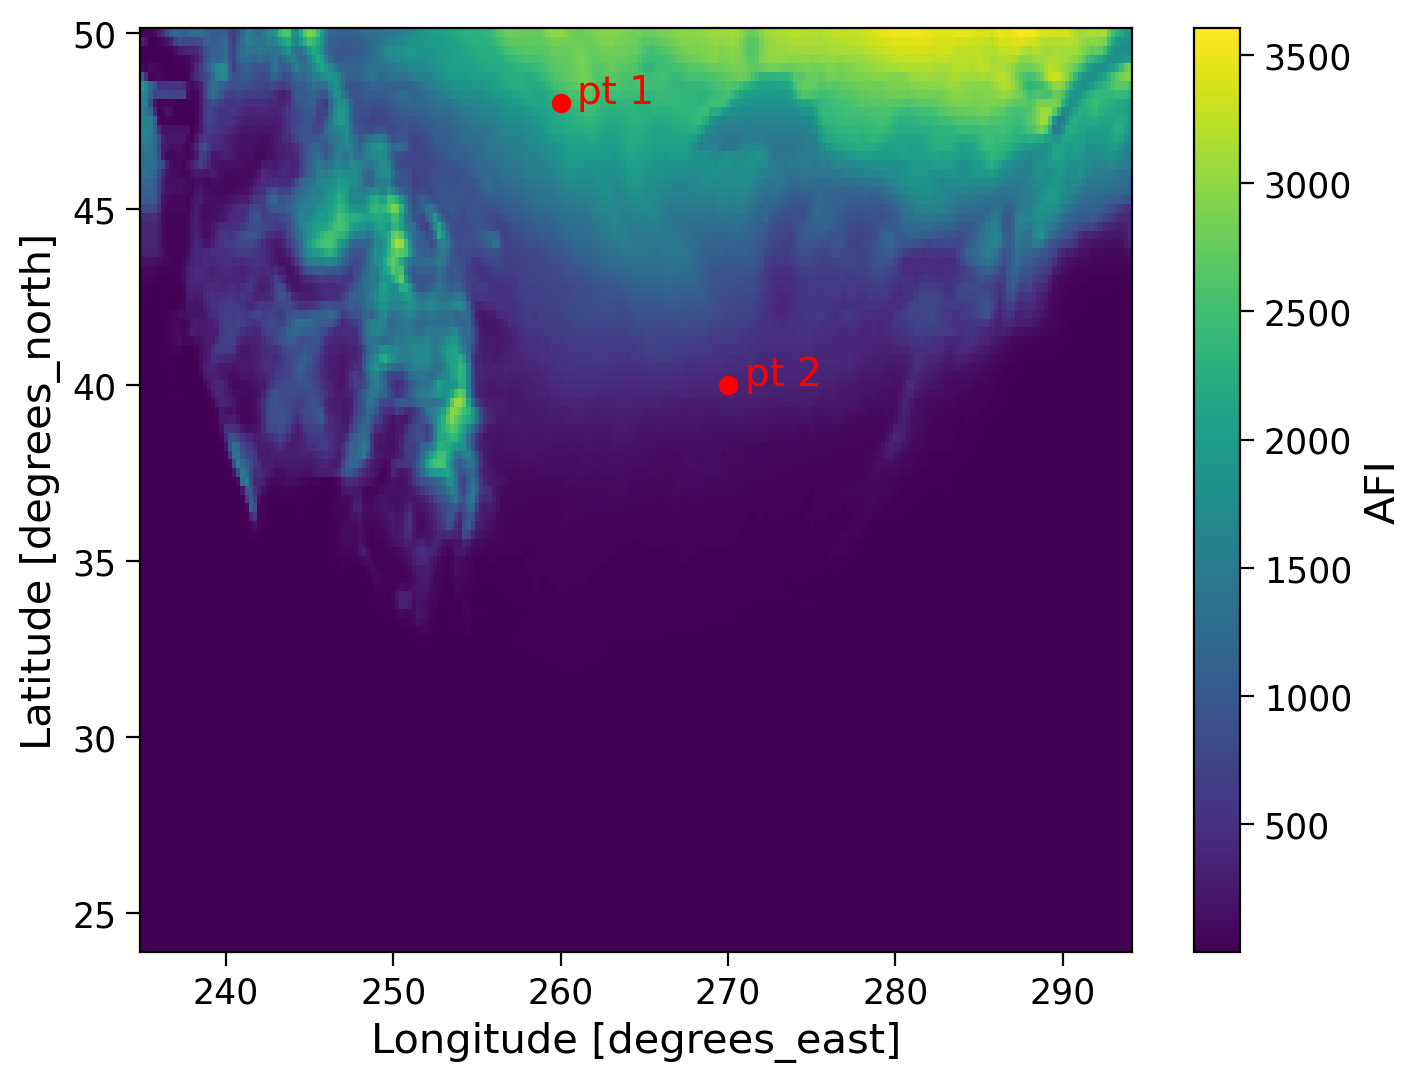

In [15]:
ds['AFI'].mean('time').plot()
plt.scatter(260,48,marker='o',color='red')
plt.text(261,48,'pt 1',color='r',size=14)
plt.scatter(270,40,marker='o',color='red')
plt.text(271,40,'pt 2',color='r',size=14)

In [11]:
units=ds['AFI'].units

# Point 1 (260E;48N)



In [12]:
ilon=260
ilat=45
afi=ds['AFI'].sel(lon=ilon,lat=ilat).load()


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2917329/1439863539.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_2917329/1439863539.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_2917329/1439863539.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
/tmp/ipykernel_2917329/1439863539.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fonts

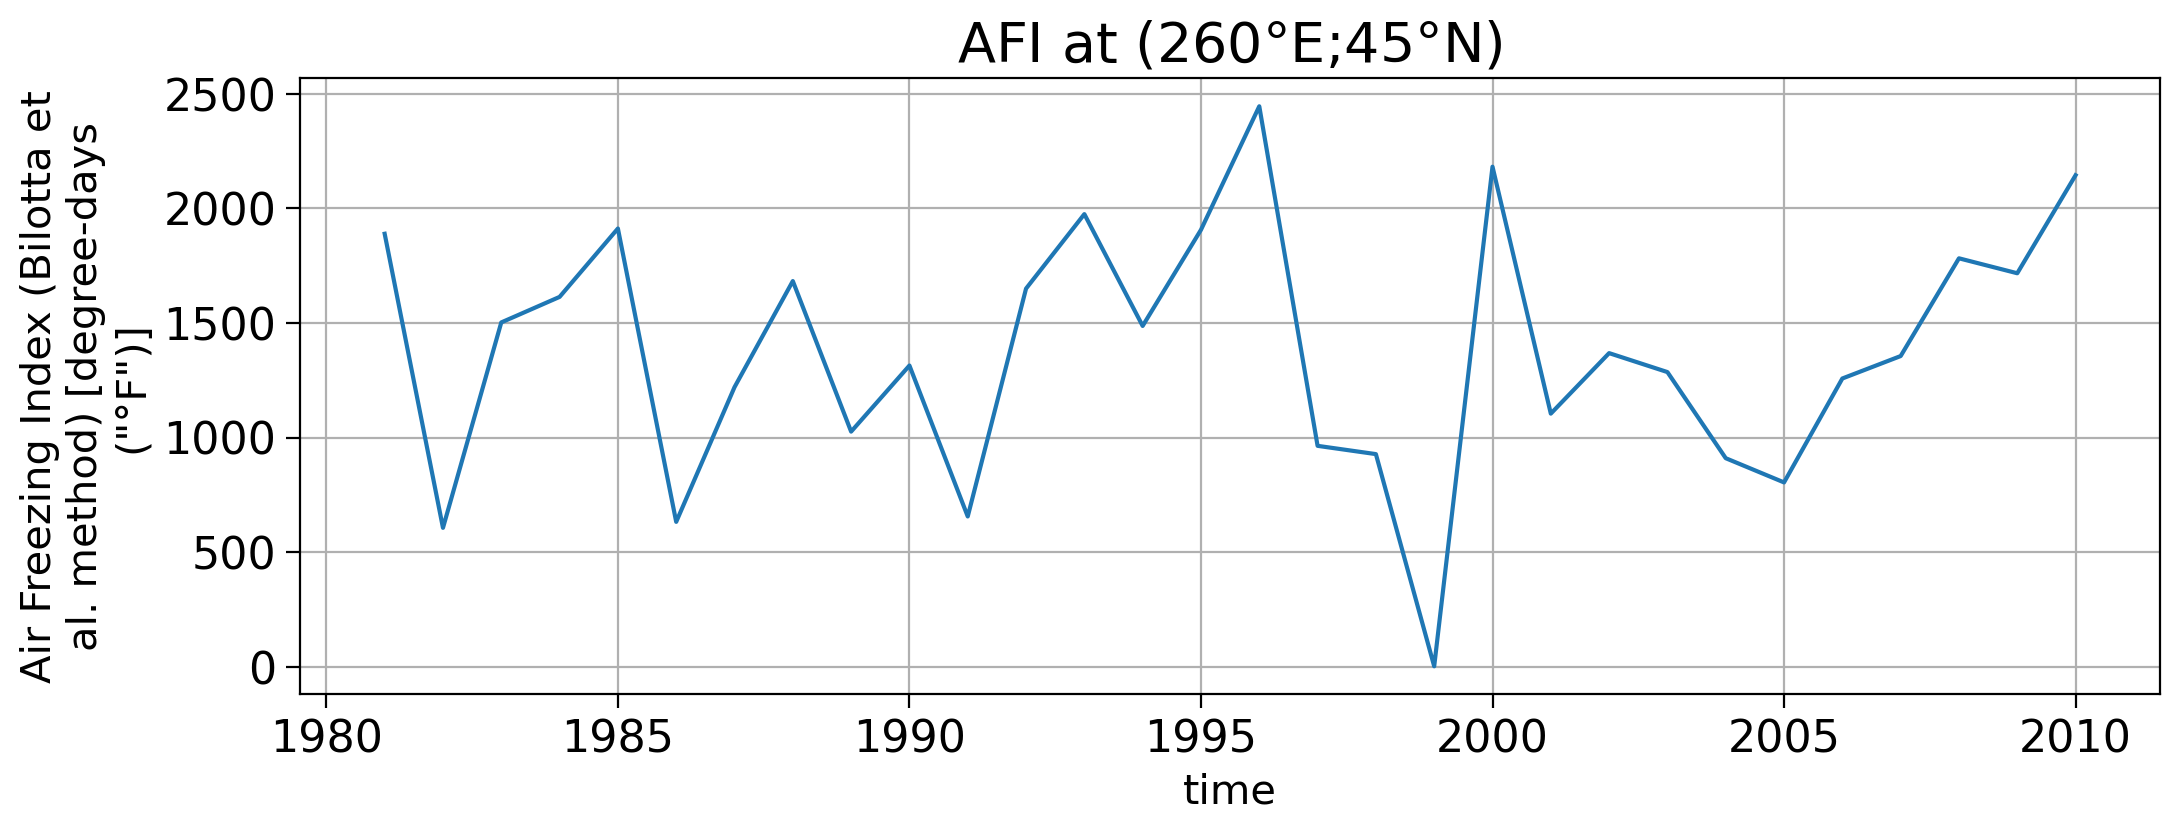

In [ ]:
fig, axs =plt.subplots(nrows=1,ncols=1,figsize=(12,4))
afi.plot(ax=axs)
axs.grid()
axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fontsize=16)
axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
outfile=f'PLOTS/AFI_{ilon}_{ilat}.png'
plt.savefig(outfile, dpi=150, facecolor='w', edgecolor='w', orientation='portrait')

/tmp/ipykernel_2917329/1853256881.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(axs.get_xticklabels(),fontsize=16)
/tmp/ipykernel_2917329/1853256881.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels(axs.get_yticklabels(),fontsize=16)


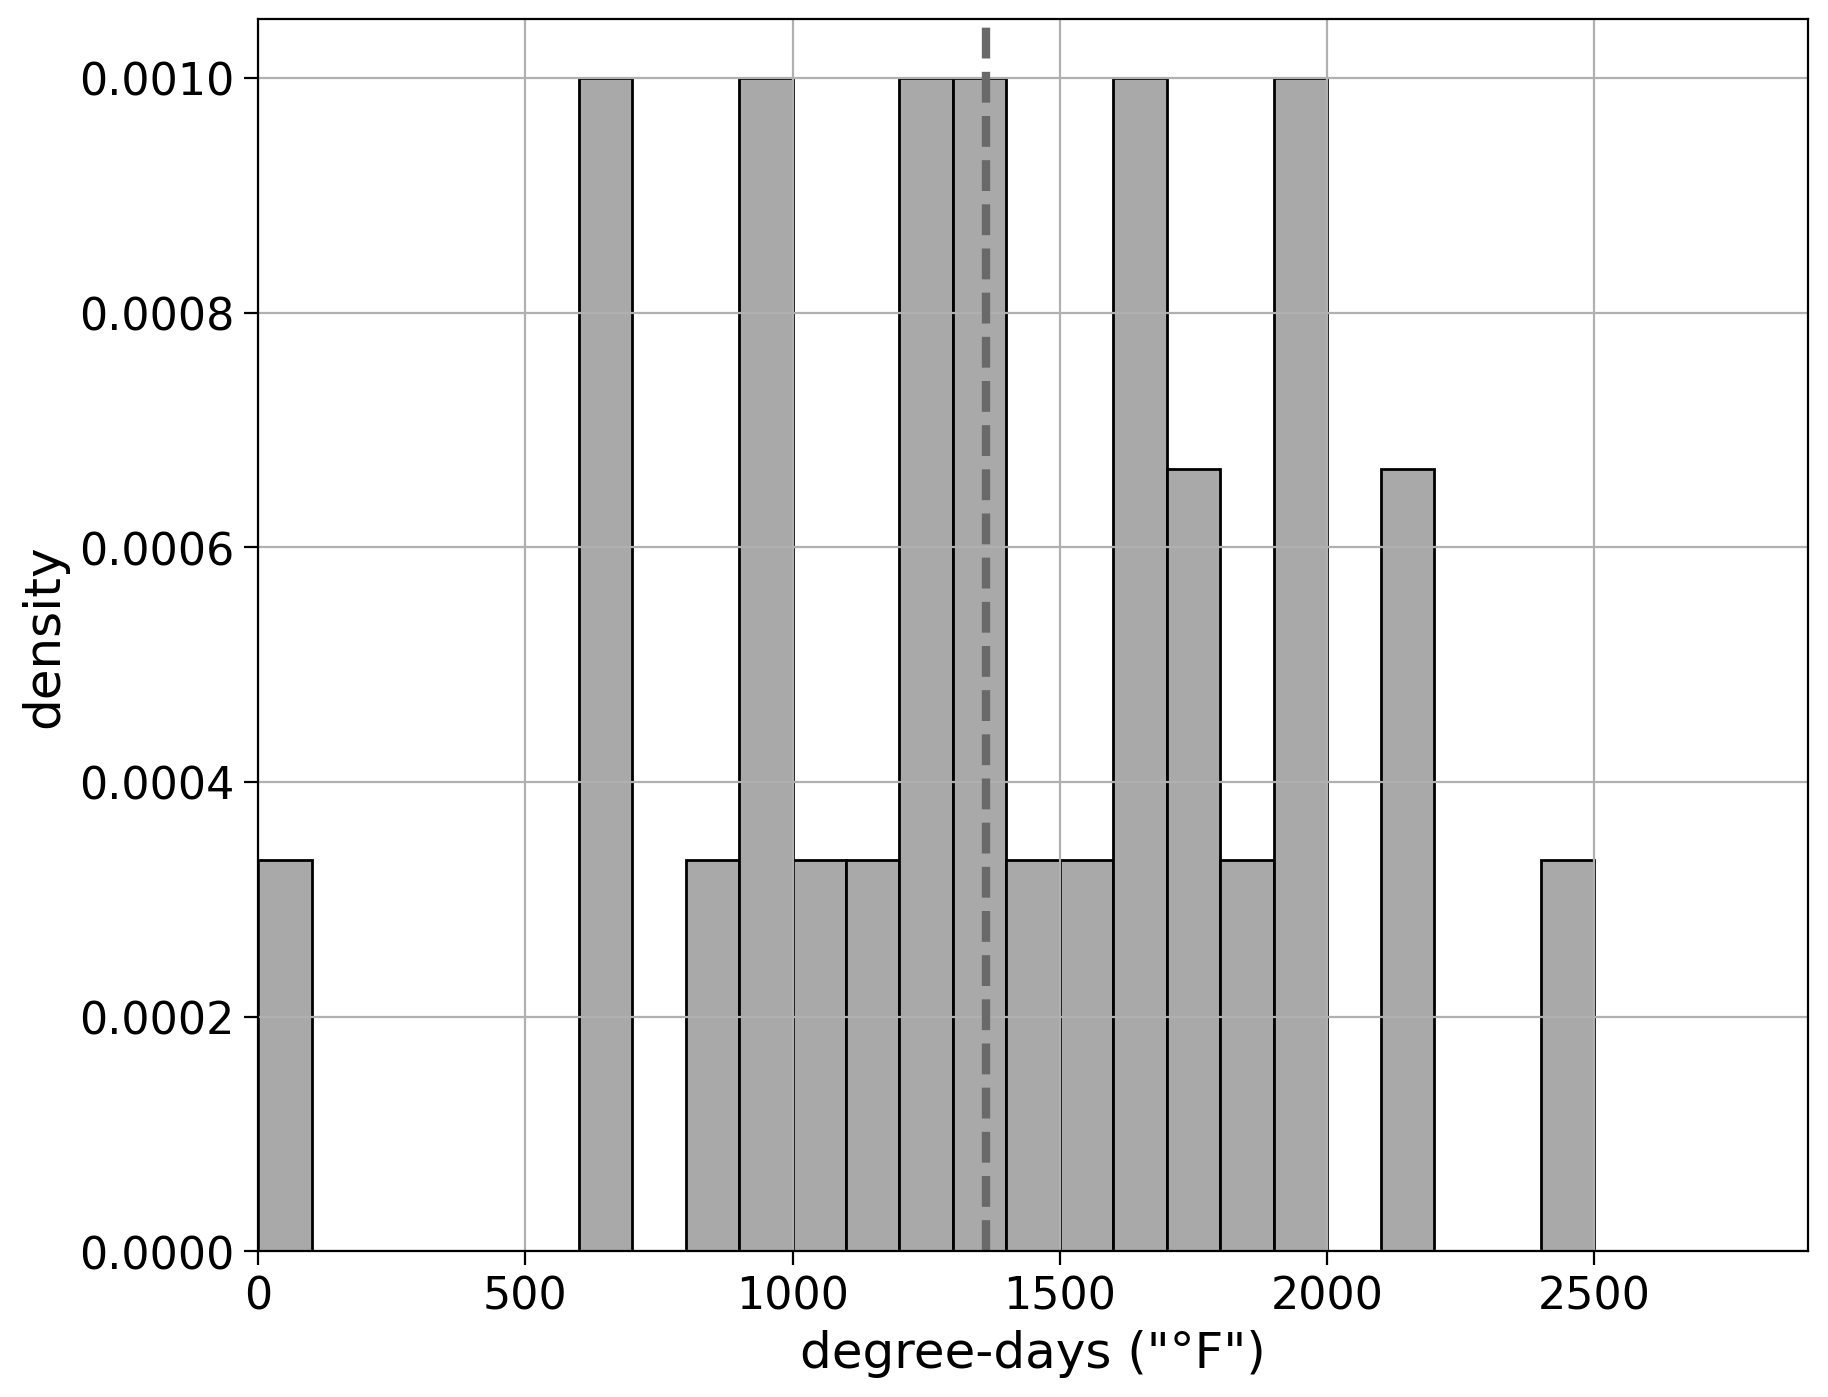

In [ ]:
#####
##### PDF Plot
#####

bins = np.arange(0,3000,100)
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
dh=histogram(afi, bins=bins,density=True, block_size=None)
axs.bar((bins[1:]+bins[:-1])*0.5,dh.data,edgecolor='k',color='darkgrey',\
          width=np.diff(bins), label='Obs')
axs.axvline(afi.median(),color='dimgrey',linewidth=3,linestyle='--')
axs.set_xlabel('')
axs.set_ylabel('')
axs.set_xlim(bins[0],bins[-1])
axs.set_ylabel('density',fontsize=18)
axs.set_xlabel(units,fontsize=18)
axs.set_xticklabels(axs.get_xticklabels(),fontsize=16)
axs.set_yticklabels(axs.get_yticklabels(),fontsize=16)
axs.grid()
outfile=f'PLOTS/AFI_PDF_{ilon}_{ilat}.png'
plt.savefig(outfile, dpi=150, facecolor='w', edgecolor='w', orientation='portrait')

# Point 2 (260E;38N)

In [22]:
ilon=270
ilat=40
afi=ds['AFI'].sel(lon=ilon,lat=ilat).load()


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2917329/1439863539.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_2917329/1439863539.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_2917329/1439863539.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
/tmp/ipykernel_2917329/1439863539.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fonts

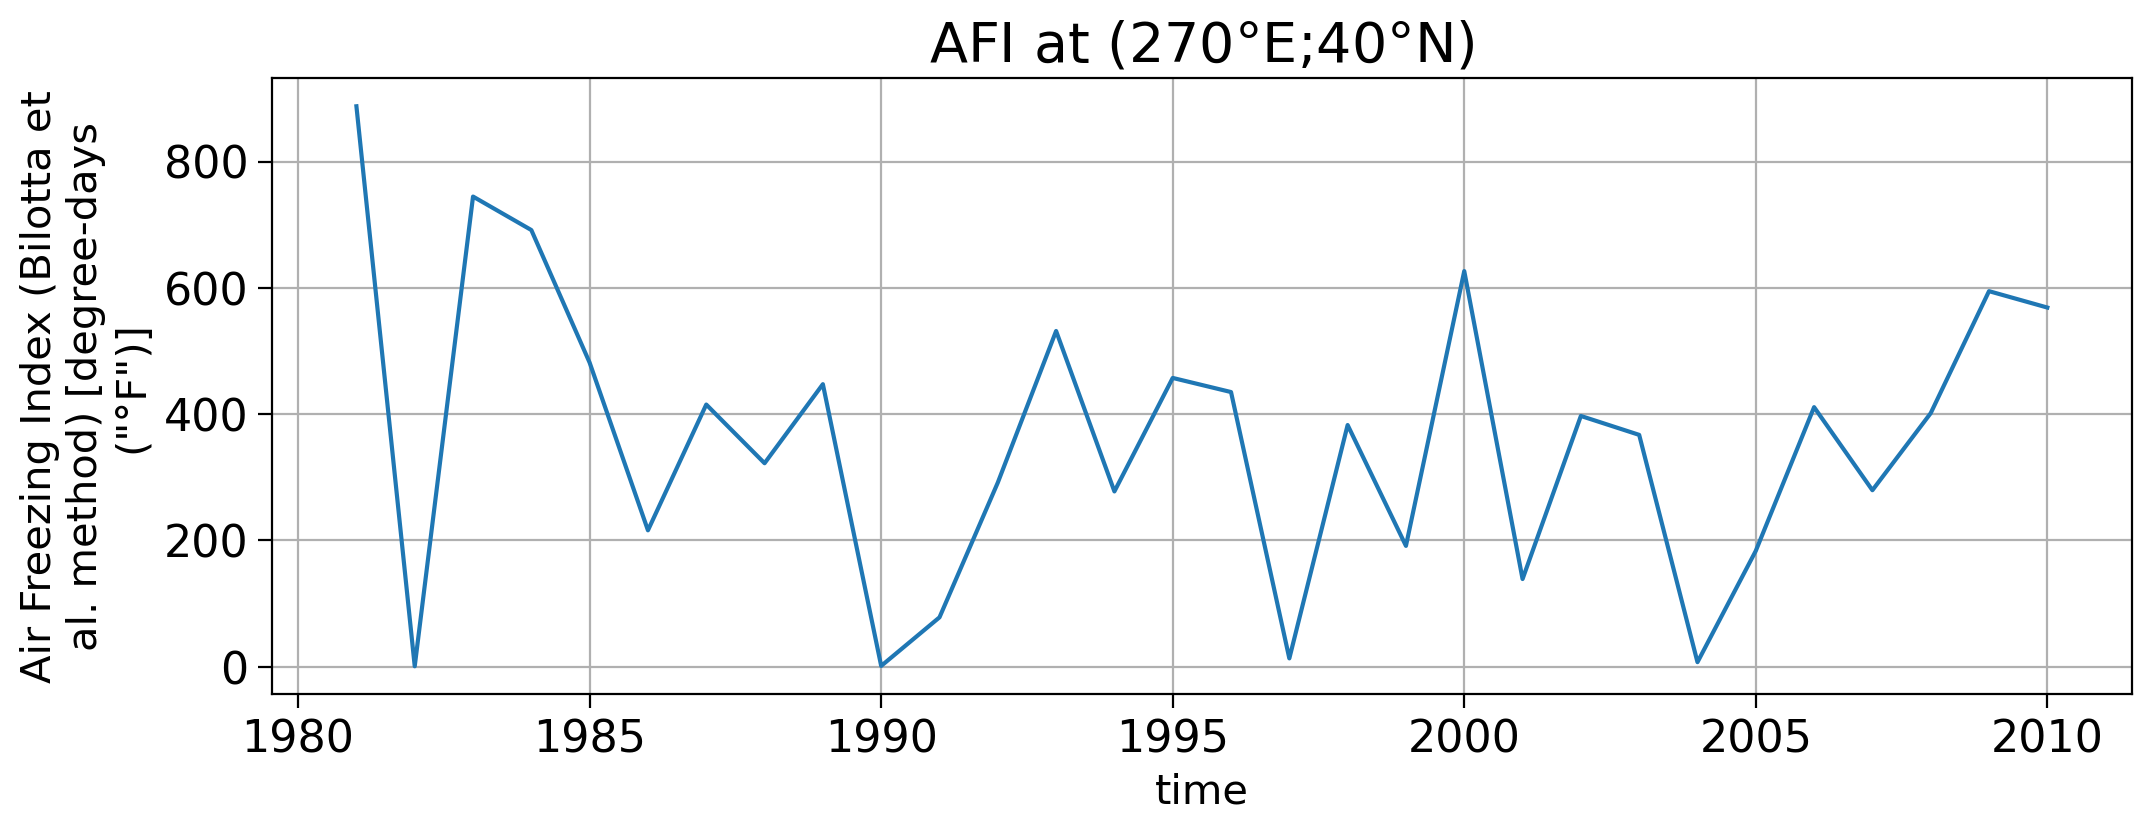

In [23]:
fig, axs =plt.subplots(nrows=1,ncols=1,figsize=(12,4))
afi.plot(ax=axs)
axs.grid()
axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fontsize=16)
axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
outfile=f'PLOTS/AFI_{ilon}_{ilat}.png'
plt.savefig(outfile, dpi=150, facecolor='w', edgecolor='w', orientation='portrait')

/tmp/ipykernel_2917329/1853256881.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(axs.get_xticklabels(),fontsize=16)
/tmp/ipykernel_2917329/1853256881.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels(axs.get_yticklabels(),fontsize=16)


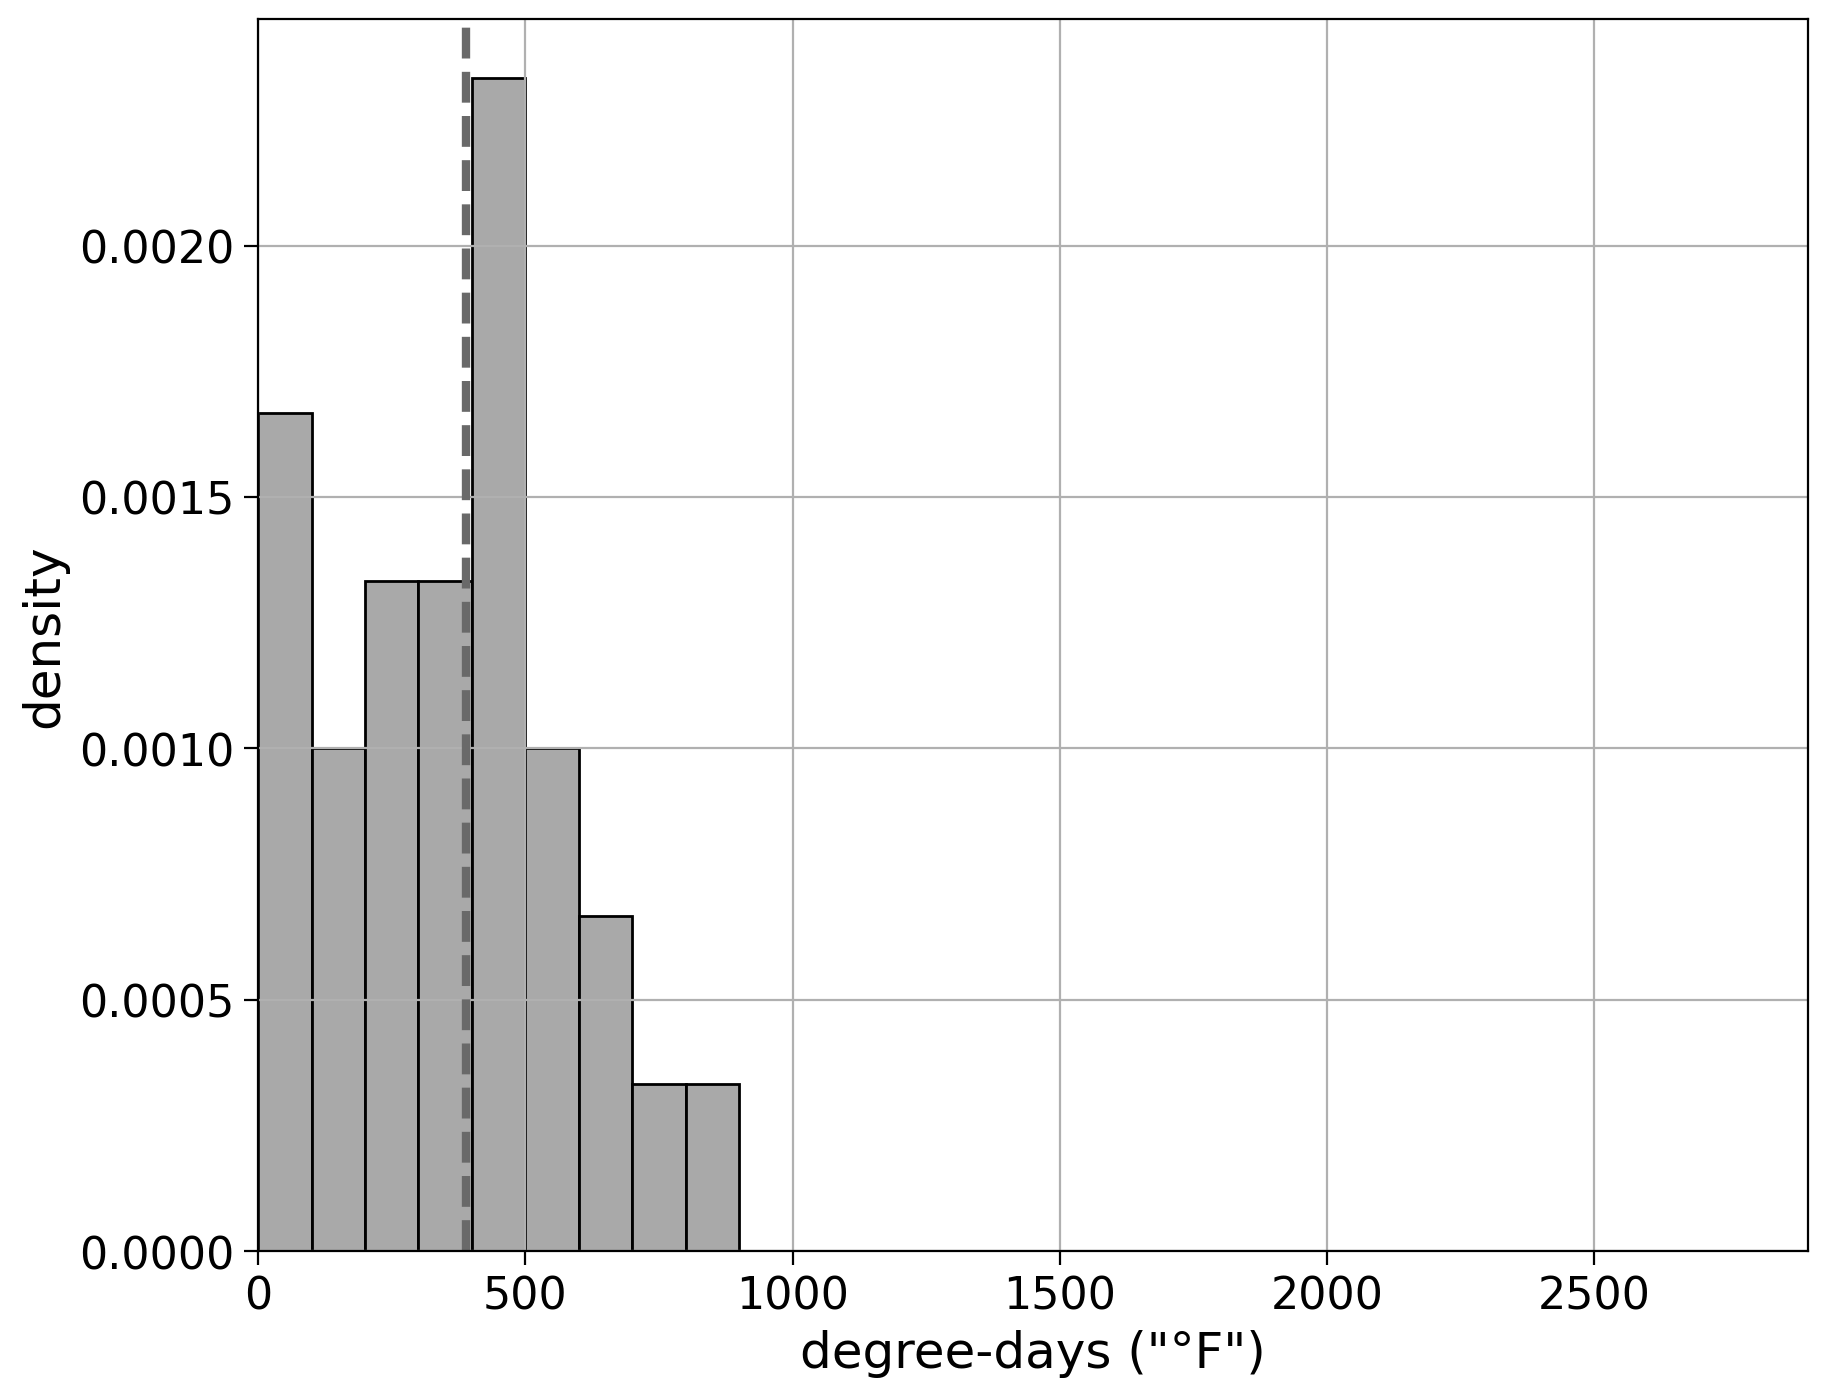

In [ ]:
#####
##### PDF Plot
#####

bins = np.arange(0,3000,100)
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
dh=histogram(afi, bins=bins,density=True, block_size=None)
axs.bar((bins[1:]+bins[:-1])*0.5,dh.data,edgecolor='k',color='darkgrey',\
          width=np.diff(bins), label='Obs')
axs.axvline(afi.median(),color='dimgrey',linewidth=3,linestyle='--')
axs.set_xlabel('')
axs.set_ylabel('')
axs.set_xlim(bins[0],bins[-1])
axs.set_ylabel('density',fontsize=18)
axs.set_xlabel(units,fontsize=18)
axs.set_xticklabels(axs.get_xticklabels(),fontsize=16)
axs.set_yticklabels(axs.get_yticklabels(),fontsize=16)
axs.grid()
outfile=f'PLOTS/AFI_PDF_{ilon}_{ilat}.png'
plt.savefig(outfile, dpi=150, facecolor='w', edgecolor='w', orientation='portrait')